total rows are :  816 total columns are :  17

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

total categorical features : ['city', 'date', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'eliminator', 'method', 'umpire1', 'umpire2']
total integers features :  ['id', 'neutral_venue']

Bangalore                      : 65                            
Chandigarh                     : 56                            
Delhi                          : 74                            
Mumbai                         : 101                           
Kolkata                        : 77               

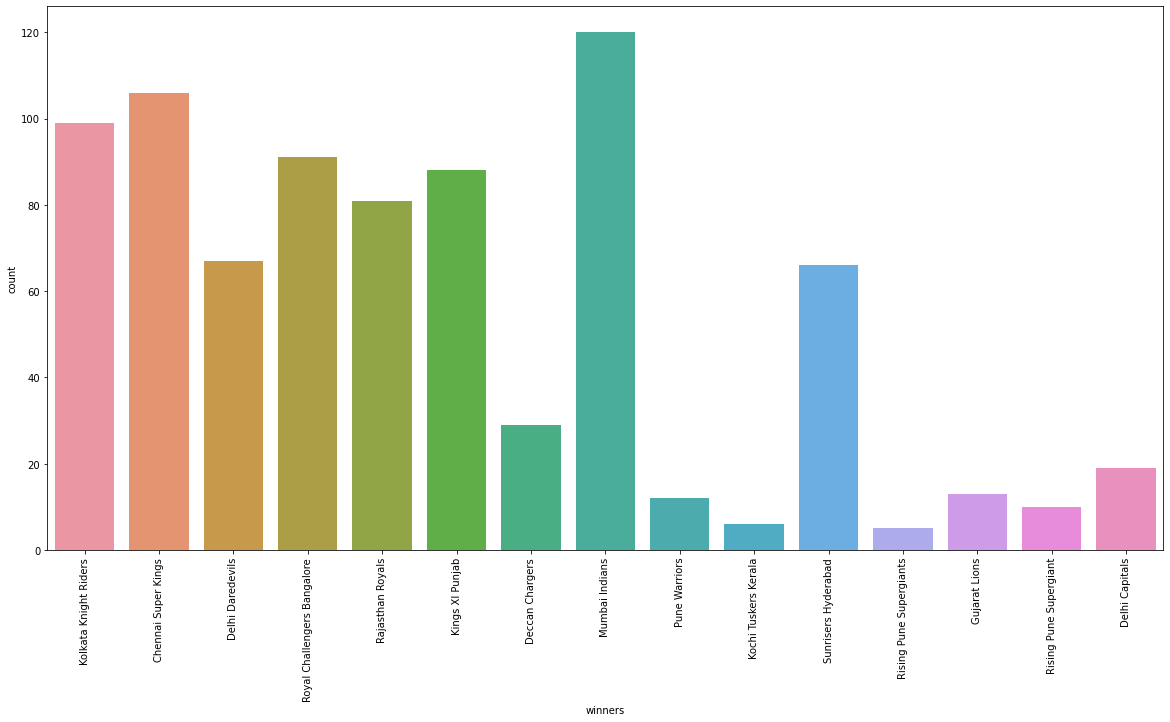

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class Ipl_data:
    
    def __init__(self):
        self.ipl_data = pd.read_csv('IPL Matches 2008-2020.csv')
        
    def shape_of_dataset(self):
        print('total rows are : ',self.ipl_data.shape[0] , 'total columns are : ',self.ipl_data.shape[1])
        
    def null_values_of_data(self):
        return self.ipl_data.isnull().sum()
    
    
    def data_types(self):
        objects = []
        integers = []
        for cols in self.ipl_data.columns:
            if self.ipl_data[cols].dtype == 'object':
                objects.append(cols)
            elif self.ipl_data[cols].dtype == 'int64':
                integers.append(cols)
        return objects , integers
    
    def count_of_cities(self):
        cities = {}
        for i in self.ipl_data['city']:
            if i not in cities:
                cities[i] = 1
            else:
                cities[i] += 1
        for x , y in cities.items():
            print('{:<30} : {:<30}'.format(x,y))
            
    def count_of_venues(self):
        venues = {}
        for i in self.ipl_data['venue']:
            if i not in venues:
                venues[i] = 1
            else:
                venues[i] += 1
        for key , value in venues.items():
            print('{:<60} : {:<60}'.format(key,value))
            
    def most_toss_win(self):
        toss  = {}
        for i in self.ipl_data['toss_winner']:
            if i not in toss:
                toss[i] = 1
            else:
                toss[i] += 1
        for key , value in toss.items():
            print('{:<60} : {:<60} '.format(key,value))
            
            
    def eleminator_wins_loss(self):
        return self.ipl_data[self.ipl_data['eliminator'] == 'Y'] , self.ipl_data[self.ipl_data['eliminator'] == 'N']
    
    
    def win_by(self):
        return self.ipl_data[self.ipl_data['result'] == 'runs'] , self.ipl_data[self.ipl_data['result'] == 'wickets']
    
    
    def toss_decision(self):
        return self.ipl_data[self.ipl_data['toss_decision'] == 'bat'] , self.ipl_data[self.ipl_data['toss_decision'] == 'field']
    
    def most_wins(self):
        plt.figure(figsize=(20,10))
        most_wins = pd.DataFrame({'winners' : self.ipl_data['winner']})
        win_count = most_wins['winners'].value_counts()
        sns.countplot(x = 'winners' , data = most_wins)
        plt.xticks(rotation = 90)
        
    def mumbai_indians(self):
        
        Mumbai_Indians = self.ipl_data[self.ipl_data['winner'] == 'Mumbai Indians' ]
        return Mumbai_Indians
    
    def chennai_super_kings(self):
        Chennai_Super_Kings = self.ipl_data[self.ipl_data['winner'] == 'Chennai Super Kings' ]
        return Chennai_Super_Kings
        
i = Ipl_data()
i.shape_of_dataset()
print()

null_values = i.null_values_of_data()
print(null_values)
print()


dtype_obj , dtype_int = i.data_types()
print('total categorical features :',dtype_obj)
print('total integers features : ',dtype_int)
print()

i.count_of_cities()
print()

i.count_of_venues()
print()

i.most_toss_win()
print()

eleminator_wins , eleminator_loss = i.eleminator_wins_loss()
print()

runs , wickets = i.win_by()
print()

bat , field = i.toss_decision()
print()

i.most_wins()

mi = i.mumbai_indians()
csk = i.chennai_super_kings()

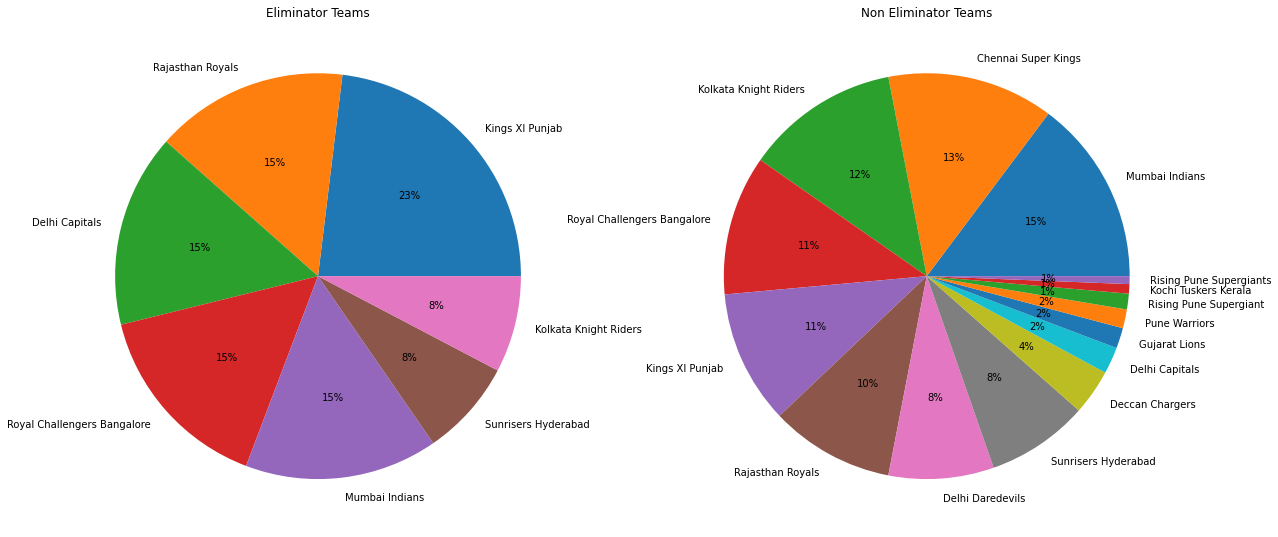

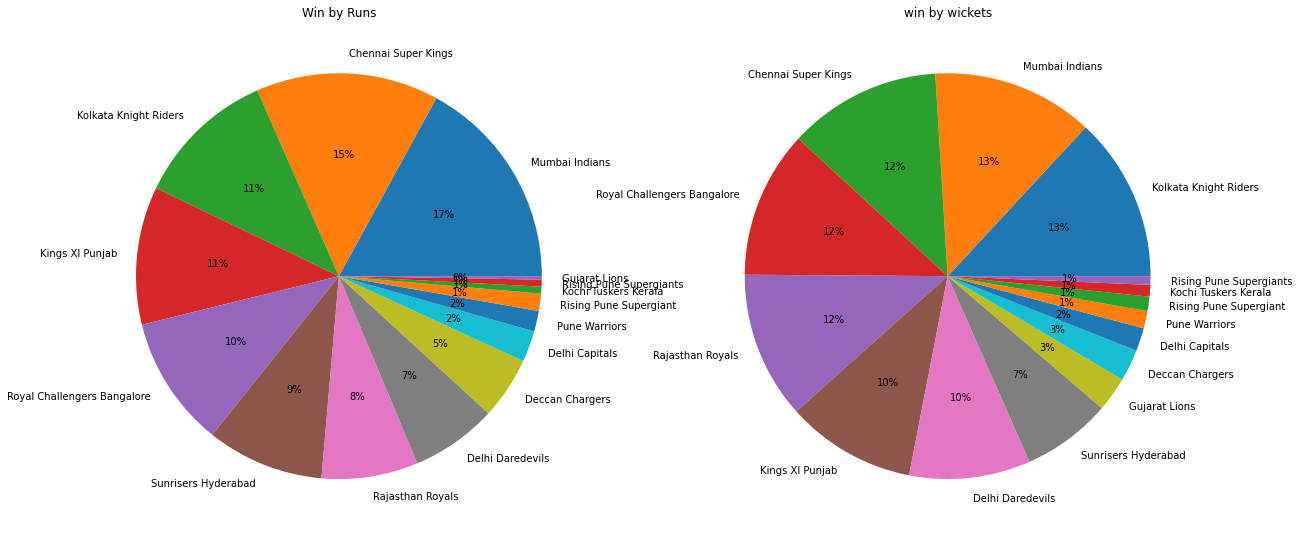

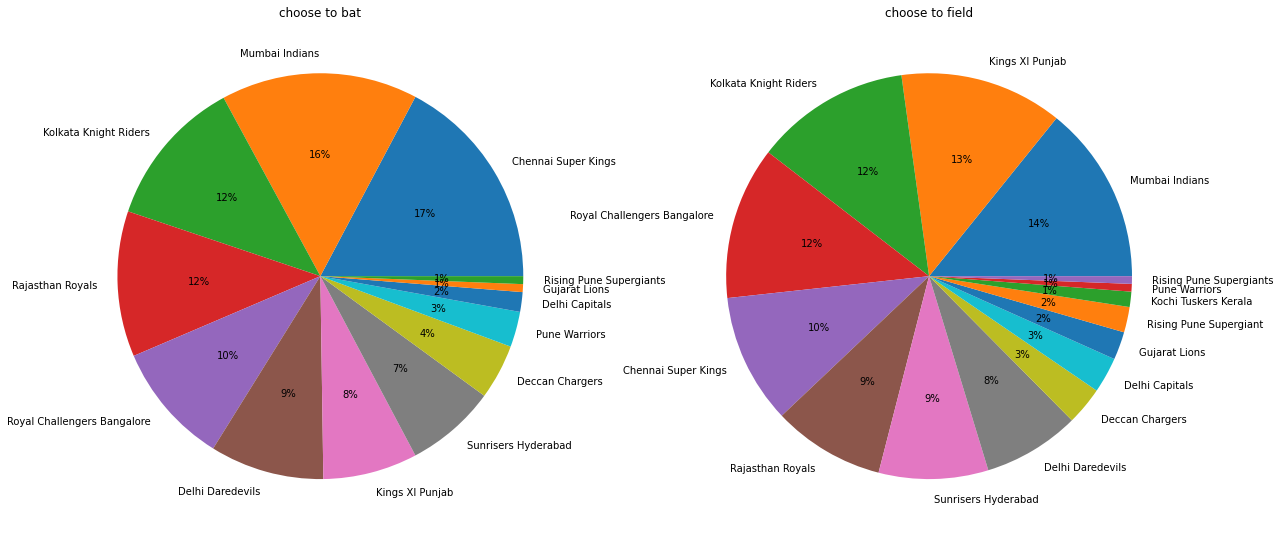

In [2]:
class Visualize:
    
    def eleminator_count(self):
        elm_wins , elem_loss = pd.DataFrame({'eliminator_y' : eleminator_wins['winner']}) , pd.DataFrame({'eliminator_n' : 
                                                                                            eleminator_loss['winner']})
        
        count_elm_wins , count_elem_loss = elm_wins['eliminator_y'].value_counts() , elem_loss['eliminator_n'].value_counts()
        labels_yes = [x for x in count_elm_wins.keys()]
        label_no = [y for y in count_elem_loss.keys()]
        fig , (ax1,ax2) = plt.subplots(1,2 , figsize = (20,10))
        ax1.pie(x = count_elm_wins ,autopct = '%1.f%%', labels = labels_yes)
        ax1.set_title('Eliminator Teams')
        ax2.pie(x = count_elem_loss , autopct = '%1.f%%' , labels = label_no)
        ax2.set_title('Non Eliminator Teams')
        
    def win_by_count(self):
        bat_wins , wkts_wins = pd.DataFrame({'bat' : runs['winner']}) , pd.DataFrame({'field' : 
                                                                                         wickets['winner']})
        
        count_bat_wins , count_field_wins = bat_wins['bat'].value_counts() , wkts_wins['field'].value_counts()
        labels_bat = [x for x in count_bat_wins.keys()]
        label_field = [y for y in count_field_wins.keys()]
        fig , (ax1,ax2) = plt.subplots(1,2 , figsize = (20,10))
        ax1.pie(x = count_bat_wins ,autopct = '%1.f%%', labels = labels_bat)
        ax1.set_title('Win by Runs')
        ax2.pie(x = count_field_wins , autopct = '%1.f%%' , labels = label_field)
        ax2.set_title('win by wickets')
        
     
    def bat_or_field(self):
        choose_to_bat , choose_to_field  = pd.DataFrame({'choose_to_bat' : bat['winner']}) , pd.DataFrame({'choose_to_field' : 
                                                                                         field['winner']})
        
        count_bat , count_field = choose_to_bat['choose_to_bat'].value_counts() , choose_to_field['choose_to_field'].value_counts()
        labels_choose_to_bat = [x for x in count_bat.keys()]
        label_choose_to_field = [y for y in count_field.keys()]
        fig , (ax1,ax2) = plt.subplots(1,2 , figsize = (20,10))
        ax1.pie(x = count_bat ,autopct = '%1.f%%', labels = labels_choose_to_bat)
        ax1.set_title('choose to bat')
        ax2.pie(x = count_field , autopct = '%1.f%%' , labels = label_choose_to_field)
        ax2.set_title('choose to field')


v = Visualize()
v.eleminator_count()
print()

v.win_by_count()
print()

v.bat_or_field()




# Mumbai Indians Analysis

In [26]:
class Mumbai_Indians:
    
    def __init__(self):
        self.mi = mi
        
    def winning_score(self):
        winning_result = {}
        
        for i in self.mi['result']:
            if i not in winning_result:
                winning_result[i] = 1
            else:
                winning_result[i] += 1
                
        for key , value in winning_result.items():
            print('{:<30} : {:<30}'.format(key,value))
            
    def times_winning_the_toss(self):
        count = 0
        for i in self.mi['toss_winner']:
            if i == 'Mumbai Indians':
                count = count + 1
        return count
            
    def toss_decision(self):
        decision_on_field = {}
        toss = self.mi[self.mi['toss_winner'] == 'Mumbai Indians']
        for i in toss['toss_decision']:
            if i not in decision_on_field:
                decision_on_field[i] = 1
            else:
                decision_on_field[i] += 1
        for key , value in decision_on_field.items():
            print('{:<30} : {:<30}'.format(key , value))
    
    def most_wins_at_venue(self):
        venue = {}
        for i in self.mi['venue']:
            if i not in venue:
                venue[i] = 1
            else:
                venue[i] += 1
        for key , value in venue.items():
            print('{:<60} : {:<60}'.format(key,value))
   
    
mumbai = Mumbai_Indians()
print('Mumbai Indians won mostly by ')
mumbai.winning_score()

print()

print('Number of time MI won the toss is : ',mumbai.times_winning_the_toss())


print()

print('Mumbai indians after winning toss')
mumbai.toss_decision()

print()

print("MI most wins according to stadium")
mumbai.most_wins_at_venue()

Mumbai Indians won mostly by 
wickets                        : 56                            
runs                           : 62                            
tie                            : 2                             

Number of time MI won the toss is :  61

Mumbai indians after winning toss
field                          : 34                            
bat                            : 27                            

MI most wins according to stadium
Eden Gardens                                                 : 10                                                          
Dr DY Patil Sports Academy                                   : 5                                                           
M Chinnaswamy Stadium                                        : 8                                                           
Wankhede Stadium                                             : 42                                                          
Rajiv Gandhi International Stadium, Uppal  

In [36]:
class Chennai_Super_Kings:
    
    def __init__(self):
        self.csk = csk
        
    def winning_score(self):
        winning_result = {}
        
        for i in self.csk['result']:
            if i not in winning_result:
                winning_result[i] = 1
            else:
                winning_result[i] += 1
                
        for key , value in winning_result.items():
            print('{:<30} : {:<30}'.format(key,value))
            
    def times_winning_the_toss(self):
        count = 0
        for i in self.csk['toss_winner']:
            if i == 'Chennai Super Kings':
                count = count + 1
        return count
            
    def toss_decision(self):
        decision_on_field = {}
        toss = self.csk[self.csk['toss_winner'] == 'Chennai Super Kings']
        for i in toss['toss_decision']:
            if i not in decision_on_field:
                decision_on_field[i] = 1
            else:
                decision_on_field[i] += 1
        for key , value in decision_on_field.items():
            print('{:<30} : {:<30}'.format(key , value))
    
    def most_wins_at_venue(self):
        venue = {}
        for i in self.csk['venue']:
            if i not in venue:
                venue[i] = 1
            else:
                venue[i] += 1
        for key , value in venue.items():
            print('{:<60} : {:<60}'.format(key,value))
   
    
chennai = Chennai_Super_Kings()
print('CSK won mostly by ')
chennai.winning_score()

print()

print('Number of time CSK won the toss is : ',chennai.times_winning_the_toss())


print()

print('CSK  after winning toss')
chennai.toss_decision()

print()

print("CSK most wins according to stadium")
chennai.most_wins_at_venue()

CSK won mostly by 
runs                           : 53                            
wickets                        : 53                            

Number of time CSK won the toss is :  61

CSK  after winning toss
bat                            : 31                            
field                          : 30                            

CSK most wins according to stadium
Punjab Cricket Association Stadium, Mohali                   : 3                                                           
MA Chidambaram Stadium, Chepauk                              : 40                                                          
M Chinnaswamy Stadium                                        : 4                                                           
Feroz Shah Kotla                                             : 6                                                           
Eden Gardens                                                 : 5                                                           
Ra